# IBM Capstone Project - Allegheny County / City of Pittsburgh 2017 Car Crash Data

This is the Jupyter Notebook of the Capstone project for the "Applied Data Science Capstone" for the IBM Professional Certification.

## Introduction / Business Problem 

Alleghney County in the City of Pittsburgh government official wants to analyze the data collected for car accidents. They want to know by using data science methodologies and algorithms of the circumstances recorded, whether there is a way to decrease the frequency of accidents. The decrease of accidents can help city officials better plan their personnel hours and resources where needed most. The goal is to plan resources more efficiently and effectively based on the predicted severity type of an accident. If an accident severity high, then more resources should be directed to help accident assistance. If an accident severity is low, then less resources can be planned.

## Data

The historical data of the crash data in 2017 contains locations and information about every crash incident reported to the police in Allegheny Country7. This will be used to train and test the developed model. 

Data will be used as an input to build a machine learning mechanism to predict the severity of the types of the accident based on key factors that might caused the accident or contribute to the accidents. The key factors can include factors such as “road conditions,” “hours of the day,” “day of the week,” “speed limit,” etc. The prediction is the “Max_Severity_Level”.

The results will be evaluated using the logistic regression methodology if possible.  

## Data Understanding

From the data, first we will clean up data columns we don't use from the dataset. There are some data that are not going to help in determine factors so it will be eliminated. Then we will create a TEST set from this data and look into the factors. 

In [142]:
import matplotlib.pyplot as plt

In [143]:
import numpy as np
import pandas as pd

In [144]:
# Read the online file by the URL , and assign it to variable "df"
car = "https://data.wprdc.org/datastore/dump/bf8b3c7e-8d60-40df-9134-21606a451c1a"
df = pd.read_csv(car)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (183) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [145]:
# show the first few rows
df.head()

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2017000009,11,2,2113,02113,2017,1,1,155,1,...,2.0,E,2.0,2058,35.0,60.0,722.0,VERONA RD,0,0
1,2017000024,11,2,2301,02301,2017,1,1,318,3,...,3.0,E,4.0,0000,25.0,0.0,0.0,E GENERAL ROBINSON ST,0,0
2,2017000026,11,2,2301,02301,2017,1,1,115,1,...,2.0,S,2.0,8045,15.0,750.0,2147.0,N SHORE INT/RAMP 750 RD,2,0
3,2017000027,11,2,2446,02446,2017,1,1,454,4,...,2.0,S,4.0,0000,35.0,0.0,0.0,HAYMAKER RD,0,0
4,2017000067,11,2,2301,02301,2017,1,1,920,9,...,2.0,N,4.0,0000,25.0,0.0,0.0,STRATFORD AV,0,0


In [146]:
# Get the dimensions of the dataframe.
df.shape

(12537, 190)

In [147]:
list(df)

['CRASH_CRN',
 'DISTRICT',
 'CRASH_COUNTY',
 'MUNICIPALITY',
 'POLICE_AGCY',
 'CRASH_YEAR',
 'CRASH_MONTH',
 'DAY_OF_WEEK',
 'TIME_OF_DAY',
 'HOUR_OF_DAY',
 'ILLUMINATION',
 'WEATHER',
 'ROAD_CONDITION',
 'COLLISION_TYPE',
 'RELATION_TO_ROAD',
 'INTERSECT_TYPE',
 'TCD_TYPE',
 'URBAN_RURAL',
 'LOCATION_TYPE',
 'SCH_BUS_IND',
 'SCH_ZONE_IND',
 'TOTAL_UNITS',
 'PERSON_COUNT',
 'VEHICLE_COUNT',
 'AUTOMOBILE_COUNT',
 'MOTORCYCLE_COUNT',
 'BUS_COUNT',
 'SMALL_TRUCK_COUNT',
 'HEAVY_TRUCK_COUNT',
 'SUV_COUNT',
 'VAN_COUNT',
 'BICYCLE_COUNT',
 'FATAL_COUNT',
 'INJURY_COUNT',
 'MAJ_INJ_COUNT',
 'MOD_INJ_COUNT',
 'MIN_INJ_COUNT',
 'UNK_INJ_DEG_COUNT',
 'UNK_INJ_PER_COUNT',
 'UNBELTED_OCC_COUNT',
 'UNB_DEATH_COUNT',
 'UNB_MAJ_INJ_COUNT',
 'BELTED_DEATH_COUNT',
 'BELTED_MAJ_INJ_COUNT',
 'MCYCLE_DEATH_COUNT',
 'MCYCLE_MAJ_INJ_COUNT',
 'BICYCLE_DEATH_COUNT',
 'BICYCLE_MAJ_INJ_COUNT',
 'PED_COUNT',
 'PED_DEATH_COUNT',
 'PED_MAJ_INJ_COUNT',
 'COMM_VEH_COUNT',
 'MAX_SEVERITY_LEVEL',
 'DRIVER_COUNT_16YR'

In [148]:
#Delete some columns that are not needed in the study
df=df.drop(['CRASH_CRN', 'DISTRICT', 'CRASH_COUNTY', 'MUNICIPALITY', 'POLICE_AGCY', 'CRASH_YEAR', 'COLLISION_TYPE', 'RELATION_TO_ROAD', 'INTERSECT_TYPE', 'TCD_TYPE', 'URBAN_RURAL', 'LOCATION_TYPE', 'SCH_BUS_IND', 'SCH_ZONE_IND', 'TOTAL_UNITS', 'PERSON_COUNT', 'VEHICLE_COUNT', 'AUTOMOBILE_COUNT', 'MOTORCYCLE_COUNT', 'BUS_COUNT', 'SMALL_TRUCK_COUNT', 'HEAVY_TRUCK_COUNT', 'SUV_COUNT', 'VAN_COUNT', 'BICYCLE_COUNT', 'FATAL_COUNT', 'INJURY_COUNT', 'MAJ_INJ_COUNT', 'MOD_INJ_COUNT', 'MIN_INJ_COUNT', 'UNK_INJ_DEG_COUNT', 'UNK_INJ_PER_COUNT', 'UNBELTED_OCC_COUNT', 'UNB_DEATH_COUNT', 'UNB_MAJ_INJ_COUNT', 'BELTED_DEATH_COUNT', 'BELTED_MAJ_INJ_COUNT', 'MCYCLE_DEATH_COUNT', 'MCYCLE_MAJ_INJ_COUNT', 'BICYCLE_DEATH_COUNT', 'BICYCLE_MAJ_INJ_COUNT', 'PED_COUNT', 'PED_DEATH_COUNT', 'PED_MAJ_INJ_COUNT', 'COMM_VEH_COUNT', 'DEC_LAT', 'DEC_LONG', 'EST_HRS_CLOSED', 'LANE_CLOSED', 'LN_CLOSE_DIR', 'NTFY_HIWY_MAINT', 'RDWY_SURF_TYPE_CD', 'SPEC_JURIS_CD', 'TCD_FUNC_CD', 'TFC_DETOUR_IND', 'WORK_ZONE_TYPE', 'WORK_ZONE_LOC', 'CONS_ZONE_SPD_LIM', 'WORKERS_PRES', 'WZ_CLOSE_DETOUR', 'WZ_FLAGGER', 'WZ_LAW_OFFCR_IND', 'WZ_LN_CLOSURE', 'WZ_MOVING', 'WZ_OTHER', 'WZ_SHLDER_MDN', 'FLAG_CRN', 'INTERSTATE', 'STATE_ROAD', 'LOCAL_ROAD', 'LOCAL_ROAD_ONLY', 'TURNPIKE', 'SUDDEN_DEER', 'SHLDR_RELATED', 'REAR_END', 'HO_OPPDIR_SDSWP', 'HIT_FIXED_OBJECT', 'SV_RUN_OFF_RD', 'WORK_ZONE', 'PROPERTY_DAMAGE_ONLY', 'FATAL_OR_MAJ_INJ', 'NON_INTERSECTION', 'INTERSECTION', 'SIGNALIZED_INT', 'STOP_CONTROLLED_INT', 'UNSIGNALIZED_INT', 'SCHOOL_BUS', 'SCHOOL_ZONE', 'HIT_DEER', 'HIT_TREE_SHRUB', 'HIT_EMBANKMENT', 'HIT_POLE', 'HIT_GDRAIL', 'HIT_GDRAIL_END', 'HIT_BARRIER', 'HIT_BRIDGE', 'OVERTURNED', 'MOTORCYCLE', 'BICYCLE', 'HVY_TRUCK_RELATED', 'VEHICLE_FAILURE', 'TRAIN_TROLLEY', 'PHANTOM_VEHICLE', 'UNLICENSED', 'NO_CLEARANCE', 'CROSS_MEDIAN', 'CURVE_DVR_ERROR', 'LIMIT_65MPH', 'SPEEDING', 'SPEEDING_RELATED', 'UNBELTED', 'PEDESTRIAN', 'CURVED_ROAD', 'VEHICLE_TOWED', 'FIRE_IN_VEHICLE', 'HIT_PARKED_VEHICLE', 'INJURY_OR_FATAL', 'COMM_VEHICLE', 'DEER_RELATED', 'HAZARDOUS_TRUCK', 'NHTSA_AGG_DRIVING', 'PSP_REPORTED', 'RUNNING_STOP_SIGN', 'TRAIN', 'TROLLEY', 'ROADWAY_CRN', 'RDWY_SEQ_NUM', 'ADJ_RDWY_SEQ', 'ACCESS_CTRL', 'ROADWAY_COUNTY', 'ROAD_OWNER', 'OFFSET', 'STREET_NAME', 'TOT_INJ_COUNT', 'SCHOOL_BUS_UNIT', 'RDWY_ORIENT', 'ROADWAY_COUNTY', 'ROUTE', 'SEGMENT', 'LN_CLOSE_DIR', 'LANE_COUNT', 'ACCESS_CTRL', 'ADJ_RDWY_SEQ', 'MAJOR_INJURY', 'MODERATE_INJURY', 'MINOR_INJURY', 'ILLUMINATION_DARK', 'ILLEGAL_DRUG_RELATED', 'DRIVER_18YR', 'DRIVER_19YR', 'DRIVER_20YR', 'DRIVER_50_64YR', 'DRIVER_75PLUS', 'DRIVER_65_74YR', 'DRIVER_17YR', 'DRIVER_16YR', 'UNDERAGE_DRNK_DRV', 'RUNNING_RED_LT', 'TAILGATING', 'ALCOHOL_RELATED','DRIVER_COUNT_16YR', 'DRIVER_COUNT_17YR', 'DRIVER_COUNT_18YR', 'DRIVER_COUNT_19YR', 'DRIVER_COUNT_20YR', 'DRIVER_COUNT_50_64YR', 'DRIVER_COUNT_65_74YR', 'DRIVER_COUNT_75PLUS', 'LATITUDE', 'LONGITUDE', 'INJURY', 'FATAL', 'MC_DRINKING_DRIVER', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'DRUG_RELATED', 'ICY_ROAD', 'SNOW_SLUSH_ROAD', 'WET_ROAD', 'WORK_ZONE_IND', 'DRINKING_DRIVER', 'CELL_PHONE', 'AGGRESSIVE_DRIVING', 'FATIGUE_ASLEEP', 'DISTRACTED'], axis=1)

In [149]:
# Get the dimensions of the newer dataframe.
df.shape

(12537, 9)

In [150]:
df.dtypes

CRASH_MONTH             int64
DAY_OF_WEEK             int64
TIME_OF_DAY             int64
HOUR_OF_DAY             int64
ILLUMINATION            int64
WEATHER                 int64
ROAD_CONDITION          int64
MAX_SEVERITY_LEVEL      int64
SPEED_LIMIT           float64
dtype: object

In [151]:
#Provides Summary Statistics
df.describe(include="all")

,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,MAX_SEVERITY_LEVEL,SPEED_LIMIT
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,12536.000000
mean,6.535056,4.134003,1364.905320,13.361011,1.750179,1.348887,0.415650,2.581160,32.645980
std,3.484981,1.941981,909.387486,9.052037,1.105173,0.995441,1.093034,3.221578,12.455851
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,851.000000,8.000000,1.000000,1.000000,0.000000,0.000000,25.000000
50%,6.000000,4.000000,1420.000000,14.000000,1.000000,1.000000,0.000000,0.000000,30.000000
75%,10.000000,6.000000,1750.000000,17.000000,3.000000,1.000000,0.000000,4.000000,40.000000
max,12.000000,7.000000,9999.000000,99.000000,8.000000,9.000000,8.000000,9.000000,70.000000


In [152]:
df.corr()

,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,ILLUMINATION,WEATHER,ROAD_CONDITION,MAX_SEVERITY_LEVEL,SPEED_LIMIT
CRASH_MONTH,1.000000,0.007969,0.010516,0.010500,0.013293,-0.032476,-0.056818,0.004807,0.028470
DAY_OF_WEEK,0.007969,1.000000,0.032011,0.032008,-0.009154,0.034740,0.046551,-0.032301,0.011434
TIME_OF_DAY,0.010516,0.032011,1.000000,0.999807,-0.004916,-0.006869,-0.009614,0.020512,-0.015587
HOUR_OF_DAY,0.010500,0.032008,0.999807,1.000000,-0.004827,-0.007216,-0.009862,0.020512,-0.015874
ILLUMINATION,0.013293,-0.009154,-0.004916,-0.004827,1.000000,0.114472,0.094815,0.004508,0.012053
WEATHER,-0.032476,0.034740,-0.006869,-0.007216,0.114472,1.000000,0.578450,-0.018432,0.012105
ROAD_CONDITION,-0.056818,0.046551,-0.009614,-0.009862,0.094815,0.578450,1.000000,-0.036391,0.036046
MAX_SEVERITY_LEVEL,0.004807,-0.032301,0.020512,0.020512,0.004508,-0.018432,-0.036391,1.000000,-0.034709
SPEED_LIMIT,0.028470,0.011434,-0.015587,-0.015874,0.012053,0.012105,0.036046,-0.034709,1.000000


By looking at the data we can see that there are several cells that have either unknown or other as the filler in its cells and we don't want those to be in the data we are study with, so we want to eliminate anything that doesn't make sense. 

In [153]:
# Filter all rows for which the hours of the day less than 25
# Filter all rows for which Time of day less than 9999 (so it actually means something)
# Filter Max severity level to take out anything that has unknown severity so anything labeled 8 or 9
# Filter Weather code to take out anything unknown so labeled 8 or 9 are eliminated
# Filter Road Condition to take take out anything unkown or other so labeled 8 or 9 are eliminated

df_filtered = df[((df['HOUR_OF_DAY'] < 25) & (df['ROAD_CONDITION']< 8) & (df['WEATHER']< 8) & (df['MAX_SEVERITY_LEVEL']< 8) & (df['TIME_OF_DAY']< 2401) & (df['ILLUMINATION']< 8))] 

# Print the shape of the dataframe 
print(df_filtered.shape) 

(9768, 9)


Text(0.5, 1.0, 'month of most crash')

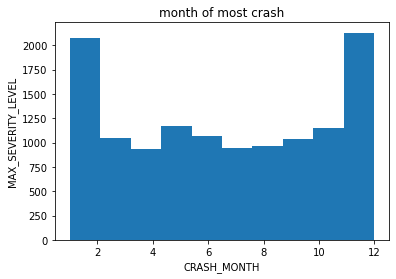

In [154]:
# Look at which month has the most crashes or is it possible to see any difference in months verses crashes
df["CRASH_MONTH"]=df["CRASH_MONTH"].astype(int, copy=True)
plt.hist(df["CRASH_MONTH"])

# set x/y labels and plot title
plt.xlabel("CRASH_MONTH")
plt.ylabel("MAX_SEVERITY_LEVEL")
plt.title("month of most crash")

Text(0.5, 1.0, 'Day of the week with most crash')

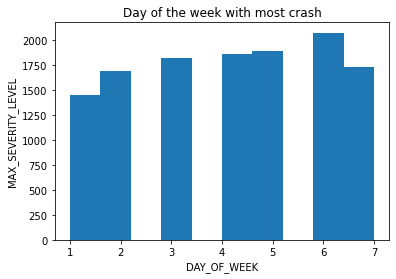

In [155]:
# Look at which day of the week has the most crashes in the data
plt.hist(df["DAY_OF_WEEK"])

# set x/y labels and plot title
plt.xlabel("DAY_OF_WEEK")
plt.ylabel("MAX_SEVERITY_LEVEL")
plt.title("Day of the week with most crash")

(0.0, 24.0)

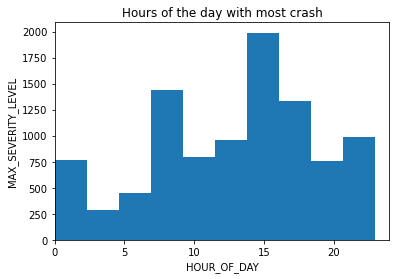

In [156]:

# Look at what hours of the day has the most crashes in the data
plt.hist(df_filtered["HOUR_OF_DAY"])

# set x/y labels and plot title
plt.xlabel("HOUR_OF_DAY")
plt.ylabel("MAX_SEVERITY_LEVEL")
plt.title("Hours of the day with most crash")

#set X axis limit
plt.xlim(0,24)

In [157]:
print('Number of incidents by HOUR_OF_DAY value:', df_filtered.groupby(['HOUR_OF_DAY']).size().sort_values(ascending=False))
print()

Number of incidents by HOUR_OF_DAY value: HOUR_OF_DAY
17    747
16    730
15    697
18    585
14    561
8     512
13    485
7     476
12    476
9     453
19    436
11    415
10    385
21    354
22    331
20    319
23    302
6     300
0     270
2     267
1     230
3     159
5     153
4     125
dtype: int64



In [158]:
print('Number of incidents by WEATHER value:', df_filtered.groupby(['WEATHER']).size().sort_values(ascending=False))
print()

Number of incidents by WEATHER value: WEATHER
1    7970
2    1302
4     455
5      19
3      12
6      10
dtype: int64



Weather Code from the WEATHER column:
1. No adverse conditions
2. Rain
3. Sleet (hail)
4. SNow
5. Fog
6. Rain and Fog

In [159]:
print('Number of incidents by ILLUMINATION value:', df_filtered.groupby(['ILLUMINATION']).size().sort_values(ascending=False))
print()

Number of incidents by ILLUMINATION value: ILLUMINATION
1    6208
3    2586
2     606
4     179
5     143
6      46
dtype: int64



Illumination Code from the ILLUMINATION column:
1. Daylight
2. Dark-no street lights
3. Dark - street lights
4. Dusk
5. Dawn
6. Dark - unknown road way

In [160]:
print('Number of incidents by ROAD_CONDITION value:', df_filtered.groupby(['ROAD_CONDITION']).size().sort_values(ascending=False))
print()

Number of incidents by ROAD_CONDITION value: ROAD_CONDITION
0    7479
1    1822
3     195
6      95
5      68
4      67
7      30
2      12
dtype: int64



Road Condition Code from the ROAD_CONDITION column:

0. Dry
1. Wet
2. Sand/mud/dirt/oil/or gravel
3. Snow 
4. Slush
5. Ice
6. Ice Patches
7. Water either standing or moving

In [161]:
print('Number of incidents by SPEED_LIMIT value:', df_filtered.groupby(['SPEED_LIMIT']).size().sort_values(ascending=False))
print()

Number of incidents by SPEED_LIMIT value: SPEED_LIMIT
25.0    4093
35.0    2238
55.0    1166
40.0     732
45.0     417
0.0      306
30.0     264
65.0     186
15.0     173
20.0     137
50.0      39
10.0      15
70.0       1
dtype: int64



# Methodology

We are ready to use our dataset and train our models. From the before the correlation table, it seems the correlation between the various features and the target is not very good. Generally looks like the correlations are close to zero.

There are some correlation between the different data. 

* One is the time of the day verses the hour of the day. It is expected because they are truly related to one another. 

* Second is the correlation between the weather and the road condition. This is probably due to the fact that a rainy day means it is going to be a wet road. A snowy day will mean either sleet road or snowy road, etc.

We will build and compare using the following Machine Learning techniques:

* Logistic Regression
* K-Nearest Neighbor (KNN)
* Decision Tree 

In [162]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

It was realized that using speed limit to determine the accident is not realistic becasue accidnets can happen during parking and such, so it won't be a good indication of how the accidnet is happened. Therefore in the model testing and fitting speed limit will not be included. 

In [163]:
features = df_filtered[['CRASH_MONTH','DAY_OF_WEEK','TIME_OF_DAY', 'HOUR_OF_DAY', 'ILLUMINATION', 'WEATHER', 'ROAD_CONDITION']]

X = np.asarray(features)
X[0:5]

array([[  1,   1, 155,   1,   3,   2,   1],
       [  1,   1, 318,   3,   3,   2,   1],
       [  1,   1, 115,   1,   3,   2,   1],
       [  1,   1, 454,   4,   3,   2,   1],
       [  1,   1, 920,   9,   1,   1,   0]])

In [164]:
y = np.asarray(df_filtered['MAX_SEVERITY_LEVEL'])
y[0:5]

array([0, 0, 4, 0, 0])

In [165]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print(X_trainset.shape)
print(y_trainset.shape)

print(X_testset.shape)
print(y_testset.shape)

(6837, 7)
(6837,)
(2931, 7)
(2931,)


## Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

In [167]:
dtree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [168]:
pptree = dtree.predict(X_testset)

In [169]:
print (pptree[0:5])
print (y_testset[0:5])

[0 0 0 0 0]
[3 3 0 3 0]


In [170]:
print("The accuracy of the Decision Tree Model is: ", metrics.accuracy_score(y_testset, pptree))

The accuracy of the Decision Tree Model is:  0.6571136131013307


In [171]:
print("Avg F1-score: %.4f" % f1_score(y_testset, pptree, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_testset, pptree, average = 'weighted'))

Avg F1-score: 0.5300
Jaccard score: 0.4387


## K-Nearest Neighbor (KNN)

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
from sklearn import metrics

In [174]:
X_knn = X
X_knn[0:5]

array([[  1,   1, 155,   1,   3,   2,   1],
       [  1,   1, 318,   3,   3,   2,   1],
       [  1,   1, 115,   1,   3,   2,   1],
       [  1,   1, 454,   4,   3,   2,   1],
       [  1,   1, 920,   9,   1,   1,   0]])

In [175]:
y_knn = y
y_knn[0:10]

array([0, 0, 4, 0, 0, 0, 0, 0, 3, 0])

In [176]:
X_knn_tr, X_knn_te, y_knn_tr, y_knn_te = train_test_split( X_knn, y_knn, test_size=0.4, random_state=4)
print ('KNN Train set:', X_knn_tr.shape, y_knn_tr.shape)
print ('KNN Test set:', X_knn_te.shape, y_knn_te.shape)

KNN Train set: (5860, 7) (5860,)
KNN Test set: (3908, 7) (3908,)


In [177]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

 #Train Model and Predict
 neigh = KNeighborsClassifier(n_neighbors = n).fit(X_knn_tr,y_knn_tr)
 yhat_knn=neigh.predict(X_knn_te)
 mean_acc[n-1] = metrics.accuracy_score(y_knn_te, yhat_knn)

 std_acc[n-1]=np.std(yhat==y_knn_te)/np.sqrt(yhat_knn.shape[0])
mean_acc

array([0.49769703, 0.60849539, 0.59646878, 0.59774821, 0.61386899,
       0.62487206, 0.62973388, 0.63561924, 0.64073695])

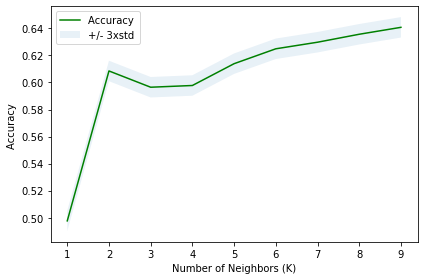

In [178]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

By the look at the plot, you can see that the most accurate K is 9 with the accuracy close to 0.64.

In [179]:
k = 9
#Train Model and Predict
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_knn_tr,y_knn_tr)
kNN_model

KNeighborsClassifier(n_neighbors=9)

In [180]:
print("The accuracy of the Decision Tree Model is: ", metrics.accuracy_score(y_knn_te, yhat_knn))

The accuracy of the Decision Tree Model is:  0.6407369498464688


In [181]:
knn_yhat = kNN_model.predict(X_knn_te)
print("KNN F1-score: %.4f" % f1_score(y_knn_te, knn_yhat, average='weighted') )
print("KNN Jaccard index: %.4f" % jaccard_score(y_knn_te, knn_yhat, average='weighted'))

KNN F1-score: 0.5287
KNN Jaccard index: 0.4311


##  Logistic Regression

In [182]:
X_lr = X

X_lr[0:5]

array([[  1,   1, 155,   1,   3,   2,   1],
       [  1,   1, 318,   3,   3,   2,   1],
       [  1,   1, 115,   1,   3,   2,   1],
       [  1,   1, 454,   4,   3,   2,   1],
       [  1,   1, 920,   9,   1,   1,   0]])

In [183]:
y_lr = y

y_lr[0:5]

array([0, 0, 4, 0, 0])

In [184]:
X_lr_tr, X_lr_te, y_lr_tr, y_lr_te = train_test_split( X_lr, y_lr, test_size=0.4, random_state=4)
print ('Logistic Regression Train set:', X_lr_tr.shape, y_lr_tr.shape)
print ('Logistic Regression Test set:', X_lr_te.shape, y_lr_te.shape)

Logistic Regression Train set: (5860, 7) (5860,)
Logistic Regression Test set: (3908, 7) (3908,)


In [185]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_lr_tr,y_lr_tr)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [186]:
yhat = LR.predict(X_lr_te)

In [187]:
yhat_lr_prob = LR.predict_proba(X_lr_te)

In [188]:
print("The accuracy of the Logistic Regression Model is: ", metrics.accuracy_score(y_lr_te, yhat))

The accuracy of the Logistic Regression Model is:  0.6627430910951894


In [189]:
print("Avg F1-score: %.4f" % f1_score(y_lr_te, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_lr_te, yhat, average='weighted'))

Avg F1-score: 0.5283
Jaccard score: 0.4392


# Result / Discussion

The results from different methodology of machine learning technique show a general decent results despite the correlation table between the features showed fairly poor correlation values. 

|Algorithm          | Jaccard | F1-score |Accuracy|
|:------------------|:-------:|:-------:|---------|
|Decision Tree      |0.4387|0.5300|0.6571|
|KNN                |0.4311|0.5287|0.6407|
|Logistic Regression|0.4392|0.5283|0.6627|

# Conclusion

This is a project to try to look at the severity of the car accidents in the Allegheny County Crash Data from PennDOT records in the city of Pittusburgh. The data give a number of the weather conditions, road conditions, speed limit, and timing of the day when the accidents happened.

The data available is based on a CSV file with 12537 records. The data is divided into two distinct sects of the records for training candidate prediction and testing prediction.

In order to find a decent solution, multiple methodology technique for prediction have been built. In partciular the machine learning ones are Decision Tree, KNN and Logistic Regression in order to test out different prediction models.

The comparison of the results indicated that the Decision Tree was the better prediction tool in terms of the higher result in accuracy.

